# **Problem set 4** - Machine Learning for Physics and Astronomy 2023/2024, UvA

## Kaya Han Taş - 15064735 (Astronomy & Astrophysics)

- The total sheet gives 27 points
- Deadline for submitting your results is **Wed, 8/5/2024, 23:59**
- **IMPORTANT**: Specify if/how AI was used to solve the exercises by filling the corresponding "Usage of AI" comments. Anything between "No" (if applicable) and a short paragraph reflecting how AI was used is fine. Failing to do so faithfully will result in the substraction of points.

In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

## Chapter 7: Basic Deep learning - The Multi Layer Perceptron （14 points）

### 7.1 Pytorch Basics (4 points)

In this exercise, we will be exploring some basic aspects of `pytorch`, its `autograd` functionality, and connecting the neural network theory to code.

Consider the folloiwng simple linear model. This is equivalent to the Logistic Regression model from last week, with 5 inputs and 1 output. We now take a look at a print out of its internal parameters. Now is a good time to (re-)familiarize yourself with the [PyTorch documentation](https://pytorch.org/docs/stable/index.html). Before asking questions, make sure you seek solutions by searching the official documentation link provided above (or try using other tools like large language models and popular search engines).

In [2]:
#We define a machine learning "model". 
#In here we use a simple linear layer.
#There are 5 Input Features and 1 Output Feature: torch.nn.Linear(5,1)
model = torch.nn.Linear(5, 1)

print(90 * "-")

#We now iterate over all the Parameters in our model as follows.
for par in model.parameters():
    #We print the Parameter. (pytorch can print out the parameters nicely for us)
    print(par)

    #We Print the Parameter's Shape and Gradient.
    print('shape:', par.shape, 'gradient:', par.grad)
    print(90 * "-")

------------------------------------------------------------------------------------------
Parameter containing:
tensor([[-0.1158,  0.1561,  0.2556, -0.2396,  0.1934]], requires_grad=True)
shape: torch.Size([1, 5]) gradient: None
------------------------------------------------------------------------------------------
Parameter containing:
tensor([0.3294], requires_grad=True)
shape: torch.Size([1]) gradient: None
------------------------------------------------------------------------------------------


1. (1 point) What is the mathematical definition of this model? How do the printed parameters of the model relate to the mathematical defintion, i.e. what does each parameter represent?  What is `par.grad` showing, and why is it `None`?  Why does it make sense that `requires_grad` is initialized to `True`?

### Answer:

* For this model, the Mathematical Definition is given with the following formula. *(Lecture 7 - Slide 14)*

$$ f(x) = y = H\left(\sum_i w_ix_i + b\right) $$
<h5><center> Perceptron Classification Rule</h5>

* **In the `torch.nn.Linear(5,1)` Model:**
    * **The activation function is not included!**
    * We have to apply the Activation Function separately.
    * This only represents the **Linear Transformation**

* For that reason, we can rewrite the Equation we have given as follows:

$$ y = \left(\sum_i w_ix_i + b\right) $$

* **Since we have 5 Inputs, $i=5$ and the formula becomes the following.**

$$ y = w_1x_1 + w_2x_2 + w_3x_3 + w_4x_4 + w_5x_5 + b $$
<h5><center> Mathematical Representation of the Linear Transformation Model</h5>

* **In here:**
    * $y$: **The Output Feature** *(There is 1 Input Feature!)*
    * $x_i$: **The Input Features** *(There are 5 Input Features!)*
    * $w_i$: **The Weights of Input Features** *(Also 5 Weights since there are 5 Input Features!)*
    * $b$: **Bias Term**

* We once again show the Printed Results:

In [3]:
for par in model.parameters():
    #We print the Parameter. (pytorch can print out the parameters nicely for us)
    print(par)

    #We Print the Parameter's Shape and Gradient.
    print('shape:', par.shape, 'gradient:', par.grad)
    print(90 * "-")

Parameter containing:
tensor([[-0.1158,  0.1561,  0.2556, -0.2396,  0.1934]], requires_grad=True)
shape: torch.Size([1, 5]) gradient: None
------------------------------------------------------------------------------------------
Parameter containing:
tensor([0.3294], requires_grad=True)
shape: torch.Size([1]) gradient: None
------------------------------------------------------------------------------------------


* We first talk about the `shape`.

* **On our code the Printed Parameters are the following:**
    * 1-) **Weights $w_i$:**
        * Stored in a **Tensor of $(1,5)$ shape!**
        * **Each Row represents one Output Feature!**
        * **Each Column represents one Input Feature!**
            * Hence we get the $(1,5)$ shape!
    * 2-) **Bias $b$:**
        * Stored in a **Tensor of $(1, )$ shape!**
        * It is only a single term.

* We now talk about the `par.grad` which gave us `gradient: None`.

* **In here `par.grad` gives `None` because:**
    * **Gradient value of a Parameter is with respect to the Loss Function.**
    * **Since we haven't done any Gradient Calculation yet (*or Backward Pass*) the Gradient for now is zero.**
    * **To Summarize the Process:**
        * 1-) We do the **Forward Pass** where we **put input data to the model to obtain predictions**.
        * 2-) We then **compare these predictions to the actual target outputs** to **get the Loss Function**.
        * 3-) We then do the **Backward Pass** where we **compute Gradients of the Loss Function with respect to the each model parameter/weight.** *(We use `autograd` for this in PyTorch.)*
        * 4-) **Then we would get a `par.grad` value instead of a `None`!**
        * 5-)**Then we do optimizations with algorithms such as Stochastic Gradient Descent (SGD) to update the Model parameters and minimize the Loss Function!** (*Training the Model*)

* Finally, we talk about the `requires_grad` which is initilized to `True`.

* **`requires_grad = True` for both Weights and Bias because:**
    * **We want PyTorch to compute gradients for Weights and Bias during Backward Pass!**
    * **Gradients are needed for training the Model!**

* **If `requires_grad = False`:**
    * **Gradients for that Parameter won't be calculated!**
    * **This is good for freezing certain layers during the training with Multi Layers!**

---------------------------------------------------------------------------------

Now let us provide an input tensor $x$ for our model and compute the gradients with respect to our parameters. This is done via the `.backward()` call.

In [4]:
#We define Input Features/Values as a Tensor.
x = torch.tensor([1., 2., 3., 4., 5.])

#Then we create our model. (same as the one before)
model = torch.nn.Linear(5, 1)

#We put our Input Tensor into our Model and get predicted parameter values.
#This is the Forward Pass!
#We added 5 "x" values and got 1 "y" value. (Linear Layer)
y = model(x)

#We do the Backwards Pass i.e. Compute the Gradients of the Input Parameters with Respect to our Model 
#Parameters!
y.backward()

#We print our Parameters (Weight and Bias) alongside the Shape and Gradient of them.
for par in model.parameters():
    print(par, par.shape, par.grad)

Parameter containing:
tensor([[-0.4365,  0.2439,  0.2964, -0.3659,  0.1809]], requires_grad=True) torch.Size([1, 5]) tensor([[1., 2., 3., 4., 5.]])
Parameter containing:
tensor([-0.0673], requires_grad=True) torch.Size([1]) tensor([1.])


2. (1 point) Analytically, what are the gradients that the above code calculates? This should stem from your model definition. Note that `par.grad` is no longer None. What information does `par.grad` contain?

### Answer:

* To explain Analytically what the are the gradients that the code calculated, we rewrite the formula that represents our Linear Model.

$$ y = w_1x_1 + w_2x_2 + w_3x_3 + w_4x_4 + w_5x_5 + b $$

* The gradients that are calculated are **the Partial Derivatives of the Output $y$ with respect to Each Parameter/Weight ($\omega_i$) and the Bias Term ($b$)!**
* Mathematically we can show the gradients as follows:

$$ \frac{\partial{y}}{\partial{w_i}} = x_i $$
$$ \frac{\partial{y}}{\partial{b}} = 1 $$

* **This is why the output of the Backward Pass are as follows:**
    * **For Weights i.e. $\partial{y}/\partial{w_i}:$**
        * **`par.grad = tensor([[1., 2., 3., 4., 5.]])`**
        * **We basically get our Input Features/Tensor as the Gradients, as we have stated above!**
    *  **For Bias i.e. $\partial{y}/\partial{b}:$**
        * **`par.grad = tensor([1.])`**
        * **We get 1 for the Bias as we have stated above!**

* We get the Input Values for the Gradients of the Weights ($\partial{y}/\partial{w_i}$) because:
    * **Gradients are calculated with respect to the Model Parameters i.e. Weights!**
    * That's why we see **Input Features** as the Gradients for Weights.
    * We only have one layer, if we had multiple layers the gradients would be calculated with respect to the previous layer's input features.
    * **This is basically the Chain Rule of Derivatives!**

3. (1 point) Let's now switch to an ever so slightly more complex model: a multi-layer perceptron (MLP) with two hidden layers (with 10 and 4 hidden neurons). What is the mathemtatical defintion of the following model, which is defined using `nn.Sequential`?  Inspect its internal parameters. How are the internal parameters of the model related to the mathematical defintion you wrote down?

In [5]:
model = torch.nn.Sequential(
    torch.nn.Linear(2, 10), torch.nn.ReLU(),
    torch.nn.Linear(10, 4), torch.nn.ReLU(),
    torch.nn.Linear(4, 1), torch.nn.Sigmoid(),
)

### Answer:

* **In the code there are 2 Activation Functions!**
    * 1-) **Sigmoid Activation Function** (Will be denoted as $\sigma$)
        * **Turns the input into a value between $0$ and $1$!**
    * 2-) **Rectified Linear Units (ReLU) Activiation Function** (Will be Denoted as ${ReLU}$)
        * ***If the input is negative:*** It turns it into a zero!
        * ***If the input is positive:*** It keeps the input as it is!

* **We Defined 3 Different Layers with 2 of the Layers being hidden!**
* Now let's check each defined layer one by one.

#### First Layer:

`torch.nn.Linear(2, 10), torch.nn.ReLU()`

* **In this Layer:**
    * **Input Features:** 2
    * **Output Features:** 10
    * **Activitation Function:** ReLU
    * **Layer Type:** Hidden *(It transforms the 2 Input Features into a Hidden Representation with 10 Neurons!)*

* We can denote the Layer mathematically as follows:

$$ h_1 = ReLU(W_1x+b_1) $$

* **In Here:**
    * $h_1$: **The Output of the Layer** => Vector with size $(10, )$
    * $W_1$: **Weight Matrix** => Matrix with size $(10, 2)$
    * $x$: **Input Vector** => Vector with size $(2, )$
    * $b_1$: **Bias Vector** => Vector with size $(10, )$
        * **We turn the Input Vector of 2 features into a Hidden Representation with 10 Neurons.**
        * **After the Weight and Input Multiplication and Addition of Bias to it, we use the ReLU Activation Function!**

#### Second Layer:

`torch.nn.Linear(10, 4), torch.nn.ReLU()`

* **In this Layer:**
    * **Input Features:** 10
    * **Output Features:** 4
    * **Activitation Function:** ReLU
    * **Layer Type:** Hidden *(It transforms the 10 Input Features into a Hidden Representation with 4 Neurons!)*

* We can denote the Layer mathematically as follows:

$$ h_2 = ReLU(W_2h_1+b_2) $$

* **In Here:**
    * $h_2$: **The Output of the Layer** => Vector with size $(4, )$
    * $W_2$: **Weight Matrix** => Matrix with size $(4, 10)$
    * $h_1$: **Input Vector** => Vector with size $(10, )$
    * $b_2$: **Bias Vector** => Vector with size $(4, )$
        * **We turn the Input Vector of 10 features into a Hidden Representation with 4 Neurons.**
        * **After the Weight and Input Multiplication and Addition of Bias to it, we use the ReLU Activation Function!**

#### Third Layer:

`torch.nn.Linear(4, 1), torch.nn.Sigmoid()`

* **In this Layer:**
    * **Input Features:** 4
    * **Output Features:** 1
    * **Activitation Function:** Sigmoid
    * **Layer Type:** Normal

* We can denote the Layer mathematically as follows:

$$ y = \sigma(W_3h_2+b_3) $$

* **In Here:**
    * $y$: **The Output of the Layer** => Vector with size $(1, )$
    * $W_3$: **Weight Matrix** => Matrix with size $(1, 4)$
    * $h_2$: **Input Vector** => Vector with size $(4, )$
    * $b_3$: **Bias Vector** => Vector with size $(4, )$

#### Internal Parameters of the Model:

* **Internal Parameters:**
    * 1-) **Determines how the Input Data is transformed as it passes through each layer of the Model!**
    * 2-) **They produce the Final Output!**

* **For Each Linear Layer we have defined the Internal Parameters are:**
    * 1-) **Weight Matrix ($W_i$):**
        * **Corresponds to the Linear Transformation of the Input Features!**
        * **Also Corresponds to the Hidden Representations!**
    * 2-) **Bias Vector ($b_i$):**
        * **Added to the Linear Transformation to introduce flexibility to the Model!**
        * **It shifts the outputs!**

4. (0.5 point) Run different random tensors generated with `torch.randn(...)` through the previous model. Start with tensors of the shape (2,), (1,2),(9, 2), (2, 4, 2). How are input shapes connected to output shapes? What is the role of the last dimension and what constraints do we have there?

*Hint: Consider the case of training a neural network, i.e. passing the neural network many individual examples. In that case, what do the first dimension(s) represent?*

### Answer:

In [6]:
#For this we rewrite the model we have defined for completeness.
model = torch.nn.Sequential(
    torch.nn.Linear(2, 10), torch.nn.ReLU(),
    torch.nn.Linear(10, 4), torch.nn.ReLU(),
    torch.nn.Linear(4, 1), torch.nn.Sigmoid(),
)

#We then need to generate Random Tensors by using torch.randn().
#For this we first define the shapes of the Tensors we want inside a list.
tensor_shapes = [(2, ), (1, 2), (9, 2), (2, 4, 2)]

#Now we create a loop that will: 
    #Go over these Tensor Shapes.
    #Create a Random Input Tensor with the Shape
    #Put it into our Model.
    #Find the Output Tensor and print out its shape.

for i, tensor_shape in enumerate(tensor_shapes):
    #We generate our Random Tensor using torch.randn()
    #Note that we use "*" to unpact the elements of tensor_shape and pass it as arguments!
    #TLDR: "*" Removes the Paranthesis and separates the elements of the tensor_shape as arguments!
    input_tensor = torch.randn(*tensor_shape)

    #We pass the Input Tensor into our Model to get the Output Tensor.
    output_tensor = model(input_tensor)

    #We print our Results.
    print(90 * "*")
    #print(f"Input Tensor: {input_tensor}")
    #print(f"Output Tensor: {output_tensor}")
    #print(90 * "-")
    print(f"{i+1}. Tensor")
    print(90 * "-")
    print(f"Input Tensor Shape: {input_tensor.shape}")
    print(f"Output Tensor Shape: {output_tensor.shape}")
    print(90 * "*")
    print(90 * "~")

******************************************************************************************
1. Tensor
------------------------------------------------------------------------------------------
Input Tensor Shape: torch.Size([2])
Output Tensor Shape: torch.Size([1])
******************************************************************************************
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
******************************************************************************************
2. Tensor
------------------------------------------------------------------------------------------
Input Tensor Shape: torch.Size([1, 2])
Output Tensor Shape: torch.Size([1, 1])
******************************************************************************************
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
******************************************************************************************
3. Tensor

* First of all let's discuss some of the terms we need to know.

* **Input Shape:**
  * 1-) **Specifies the Dimensions of the Input Data that is fed into the Neural Network!**
  * 2-) **First Dimension represents the *batch size*!** *(Batch Size indicates the Number of Samples or Examples processed simultaneously during each training iteration.)*
  * 3-) **Subsequent Dimensions represent features or dimensions in the Input Data.** (Such as image height, width, channels etc.)

* **Output Shape:**
  * 1-) **Represents the predictions or output of the Neural Network after processing the Input Data!**
  * 2-) **First Dimension represents the *batch size*!**
  * 3-) **Subsequent Dimensions *depend on the architecture of the Neural Network and the Operations performed by its layers!***

* **Role of Last Dimension:**
  * 1-) **Depends on the specific operations performed by the Neural Network's Layers!**
  * 2-) **It typically represents the Number of Features or Attributes for each data point!**
  * 3-) **In fully connected/dense layers it represents the Number of Neurons in the Layer.**

* **Constraints:**
  * 1-) **Relates to the Batch Size and the Independence of Transformations within a Batch!**
  * 2-) **Depends on the architecture of the Neural Network and the Operations performed by its layers!**
  * 3-) **It ensures compatibility with the Model's Input Parameters and Batch Processing!**

* Now let's analyze the Tensor shapes one by one.
    * **1. Tensor:**
        * Input Tensor Shape: $[2, ]$ => **Batch of 2 Samples with 1 Feature for each**
        * Output Tensor Shape: $[1, ]$ => **Batch of 1 Sample with 1 Feature for each**
        * **Constraints:**
            * *None since the model already expects Input shape of $(2, )$*
    * **2. Tensor:**
        * Input Tensor Shape: $[1, 2]$ => **Batch of 1 Sample with 2 Feature for each**
        * Output Tensor Shape: $[1, 1]$ => **Batch of 1 Sample with 1 Feature for each**
        * **Constraints:**
            * *There is only one data point on the Batch so the model will process one sample at a time!*
            * *Limits the practical application of the model and makes it less efficient.*
    * **3. Tensor:**
        * Input Tensor Shape: $[9, 2]$ => **Batch of 9 Samples with 2 Feature for each**
        * Output Tensor Shape: $[9, 1]$ => **Batch of 9 Samples with 1 Feature for each**
        * **Constraints:**
            * *Each datapoint in the batch undergoes the same transformation throughout the model independently.*
    * **4. Tensor:**
        * Input Tensor Shape: $[2, 4, 2]$ => **Batch of 2 Samples with 2 Feature for each**
        * Output Tensor Shape: $[2, 4, 1]$ => **Batch of 2 Sample with 1 Feature for each**
        * **Constraints:**
            * *Each datapoint in the batch, represented by the subsequent dimensions, undergoes the same transformation throughout the model independently.*
            * *Compared to the 3. Tensor, the difference is that now our Batch has 2 samples.*

5. (0.5 points) Give one additional shape that would lead to an error when tried and explain why!

### Answer:

* Let's remind ourselves how our model looks.

In [7]:
model = torch.nn.Sequential(
    torch.nn.Linear(2, 10), torch.nn.ReLU(),
    torch.nn.Linear(10, 4), torch.nn.ReLU(),
    torch.nn.Linear(4, 1), torch.nn.Sigmoid(),
)

* **For the model, it expects 2 Features as the input!!!**
* For that reason **any type of input with features more or less than 2 features would give us an error!**

* We could try an input tensor with shape $[2, 5]$ i.e. *an input with 5 Features* to see this on our code.
    * **`input_tensor = torch.randn(2, 5)`**
    * **`output_tensor = model(input_tensor)`**
    * **Result:** **`RuntimeError: mat1 and mat2 shapes cannot be multiplied (2x5 and 2x10)`**

**Usage** of AI: *Used **mostly** on explaining the Code and the Theory behind what the code does.*

### 7.2 Classification! From logistic regression to classification with MLPs (5 points)


This exercise will show you how to solve more complicated classification tasks using MLPs with PyTorch. We will here use our own toy simulator to generate training data sets.  The simulator that is implemented below produces points in the 2-dim hypercube and classifies them as y = 0, 1 in a ring-segment pattern.  There are two parameters that you can play with to change that pattern.

Below is an example code that targets this classification problem with a neural network using one (output) node with a sigmoid activation function, similar to what was used for the logistic regression in exercise sheets 3 and 4. Try to run and understand the code.

In [8]:
#We use .manual_seed(0) so that we can reproduce the random process again instead of changing it each time
#we run the code.
#This has the same idea with np.random.seed(0)!
torch.manual_seed(0)

In [9]:
#We define a function as the simulator.
#It takes the following parameters:
    #nsamples: Number of Samples
    #contrast: Used for scaling on calculating probability with Sigmoid Function.
    #scale: Used for scaling on calculating probability with Sigmoid Function.
def simulator(nsamples, contrast = 7, scale = 7):
    #We generate a random tensor with the Shape (Number of Samples, 2) i.e. with 2 Features.
    X = torch.rand(nsamples, 2)

    #We calculate the Euclidean Distance for each sample. => sqrt(x^2 + y^2)
    #For this we use the square root of the sum of squares of the first and second columns of 
    #the Random Tensor!
    R = torch.sqrt(X[:,0]**2 + X[:,1]**2)

    #We calculate the Probability of a Positive "+" outcome by using the Sigmoid Function.
    #We apply the Sigmoid Function to the Cosine of the Euclidean Distance.
    #We multiply the the Euclidean Distance with "scale" and scale it with "contrast".
    #We do this so that the "p" values are between 0 and 1, which represent the Probabilities!!!
    p = torch.sigmoid(torch.cos(R*scale)*contrast)

    #We then generate Binary Labels by checking the probabilities.
    #Note that we use the Bernoulli distribution here which only has two outputs: 0 and 1.
    y = torch.bernoulli(p)

    #We return the Randomly Generated Input Tensor and the resulting Binary Labels.
    return X, y

#We try the Simulator for 3000 samples.
X, y = simulator(3000)  # Data set

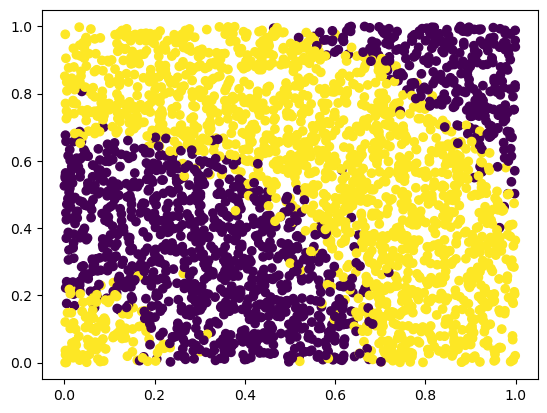

In [10]:
#We plot our Randomly Generated Input Tensor values i.e. the features.
#Note that c is coloring, so we color the Features depending on their Probabilities which are 0 and 1!
plt.scatter(X[:,0], X[:,1], c = y)

In [11]:
#We scale the coordinates to mean = 0 and standard deviation = 1!
#This which makes it easier to train the neural networks.

#We scale each feature by substracting the mean of all the feature values.
#This makes the Mean of each feature zero!
X_scaled = X - X.mean(axis=0)

#We divide Scaled Feature Values with zero mean with the Standard Deviation of all feature values.
#This makes the Standard Deviation of each feature one!
X_scaled = X_scaled/X_scaled.std(axis=0)

In [12]:
#This our logistic regression model with linear basis functions. 
#We use the compact `nn.Sequential` technique to define the network.
#Note that we did the exact thing in the previous part as well.
model = torch.nn.Sequential(torch.nn.Linear(2, 1), 
                            torch.nn.Sigmoid())

Here we are using the so called [Adam](https://arxiv.org/abs/1412.6980) optimizer. It's update step is slightly more sophisticated than the basic stochastic gradient descent optimizer used in the last exercise sheet. Instead of `torch.optim.SGD`, it can be accessed as `torch.otpim.Adam`.

In [13]:
#We now define loss function and optimizer.

#We first define the Loss Function.
#We plan to calculate the BCE Loss between predicted probabilities "p" and ground truth labels "y"!
#The formula is the same as torch.nn.BCELoss()! => -((1-y)*torch.log(1-p) + y*torch.log(p)).sum()
#Note that e.g. "f = lambda x: x^2" generates a function f(x) = x^2
criterion = lambda p, y: -((1-y)*torch.log(1-p) + y*torch.log(p)).sum()

#We use an Alternative Optimizer called "Adam" as follows.
#Note that lr is the Learning Rate here.
optimizer = torch.optim.Adam(model.parameters(), lr =0.01)

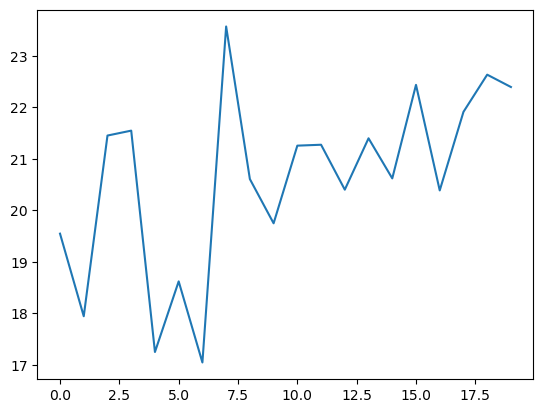

In [14]:
#This is a standard training loop

#We first define a list to contain the loss history.
loss_hist = []

#Then we define the number of training examples per "mini"batch
nbatch = 32

#We also define the number of epoches i.e. Times we iterate through the entire dataset.
nepochs = 20

#We then iterate over the dataset.
for epoch in range(nepochs):
    #It is important to shuffle the dataset at each epoch so that the minibatches are not always the same.
    #For that reason we use np.random.permutation to shuffle the dataset to avoid same minibatches for each
    #iteration.
    #np.random.permutation => Gives different randomized "indices".
    shuffle = np.random.permutation(len(X))
    X_shuffled = X_scaled[shuffle]
    y_shuffled = y[shuffle]

    #We check how many minibatches we can create from the Input Tensor we have.
    for i in range(len(X)//nbatch):
        #We scale all of the minibatches.
        X_scaled_batch = X_shuffled[i*nbatch:(i+1)*nbatch]

        #We then shuffle these minibatches.
        y_batch = y_shuffled[i*nbatch:(i+1)*nbatch]

        #We set the Gradient to Zero!
        optimizer.zero_grad()

        #We call the Model to Make Predictions! (forward pass)
        y_pred = model(X_scaled_batch).squeeze(1)

        #We Evaluate the Predictions using Loss! (compute loss)
        loss = criterion(y_pred, y_batch)
        
        #We Evaluate the Gradient of the Loss. (backward pass)
        loss.backward()

        #We take an Optimizer Step!
        optimizer.step()

    #We append the loss to the list we have defined.
    loss_hist.append(loss.item())

#We plot the Loss History per iteration.
plt.plot(loss_hist)

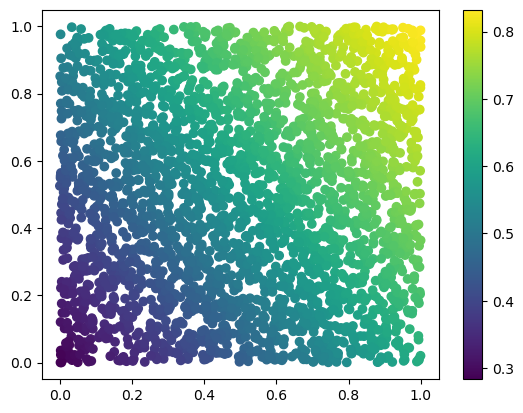

In [15]:
#We get the Predicted y values.
        #.detach().numpy() => Detaches the Output Tensor from the Computational Graph and converts it to Numpy
    #Array. (Detach removes the Tensor from the Graph to avoid Gradient Calculations)(Numpy Array conversion 
    #is good for matplotlib!)
y_pred = model(X_scaled).squeeze(1).detach().numpy()

#We plot our Randomly Generated Input Tensor values i.e. the features.
#This time we color the Features depending on the predicted y values!
plt.scatter(X[:,0], X[:,1], c = y_pred)
plt.colorbar()

This is actually a pretty bad result, since it does not reflect our training data.  This is not a surprise, since the simple linear regression model with linear basis functions cannot generate a pattern like our training data. We will improve now in the next steps.

1.  (1 point) Explain briefly (one sentence each and in your own words) the role of the following components of the training loop: `nbatch`, `//`, `zero_grad()`, `.backward()`, `optimizer.step()`?

### Answer:

* **`nbatch`**
    * **Used to define the number of Training Examples per mini-batch!**
    * **Controls how many samples are processed simultaneously per iteration!**

* **`//`**
    * **Known as the "Floor Division Operator"!**
    * **In the context of the code, it is used to determine how many mini-batches can be created from our Input Tensor!**
    * **Ensures that the Minibatches all have an Equal number of samples!**

* **`zero_grad()`**
    * **Resets the Gradients of the Parameters of the Neural Network Model to zero!**
    * **This prevents the accumulation of the Gradients during iterations!**

* **`.backward()`**
    * **Known as Backward Pass!**
    * **Computes the Gradient of the Loss Function with respect to the Model Parameters.**

* **`optimizer.step()`**
    * **Takes a step in the Optimizer!**
    * **Updates the Model Parameters based on the Computed Gradients and the Optimizer we use!** (In this case we use "Adam" as the Optimizer)

2. (1 point) We saw above that the output of our model does not look like what we want. To judge this more quantitatively, write an accuracy function, similar to exercise sheet 2, and quantify the performance of the model using the 3000 points used for training. Use `np.around` to round the predictions of the network, compare with the truth, and calculate the fraction of matches.

*Hint*: The accuracy here is measured by the frequency in which the model gives higher probability to the true label.

### Answer:

In [16]:
def accuracy(model, data, target):
    """Takes the Model, the input data and the target values. Returns the
    Fraction of Matches between the model output and the target values.
    
    Input:
    ----------------------------------------------------------------------------
    model: Training Model/Neural Network Model.
    data: Input Tensor to the model.
    target: Target Values/Vector.
    
    Output:
    ----------------------------------------------------------------------------
    accuracy: The Fraction of Matches for Model Output and Target Values.
    
    """

    #We get the Predicted Probabilities by using the Model.
    predicted_prob = model(data).squeeze(1)

    #We then round the predictions by using np.around to obtain binary predictions.
    rounded_predictions = np.around(predicted_prob.detach().numpy())

    #We then calculate the Number of matches between rounded predictions and targets
    #given by the user.
    matches = np.sum(rounded_predictions == target.numpy())

    #Finally, we calculate the accuracy i.e. Fraction of Matches.
    accuracy = matches / len(target)
    
    return accuracy

3. (3 points) Improve the above model by introducing an additional hidden layer. Try out 2, 5, 25 and 50 as sizes for the single hidden layer. Use a ReLU activation function (`torch.nn.ReLU()`). How does it affect the result qualitatively? Evaluate this using the accuracy function from above.

### Answer:

In [17]:
#In here the different "Hidden_sizes" defines how many neurons/units the Hidden Layer has!

#We define hidden sizes given in the question as a list and loop over them to check the accuracy of the models
#depending on how many neurons/units the hidden layer has.
hidden_sizes = [2, 5, 25, 50]

#We loop over different hidden sizes.
for size in hidden_sizes:
    #We use the structure we had on our previously defined model.
    #This time, we add the hidden layers.
    #For this we use "hidden_size" where the size of the Hidden Layers will be defined by the operation 
    #we will do.
    #The hidden layer will use "torch.nn.ReLU()" activation function.
    model_hidden = torch.nn.Sequential(torch.nn.Linear(2, size),
                                       torch.nn.ReLU(),
                                       torch.nn.Linear(size, 1),
                                       torch.nn.Sigmoid())

    #We define the Loss function and the Optimizer.
    criterion = torch.nn.BCELoss()
    optimizer = torch.optim.Adam(model_hidden.parameters(), lr = 0.01)

    #We then train our model once again.
    for epoch in range(nepochs):
        optimizer.zero_grad()
        outputs = model_hidden(X_scaled)
        loss = criterion(outputs.squeeze(1), y)
        loss.backward()
        optimizer.step()
        
    #We finally evaluate it with the accuracy function we have previously defined.
    accuracy_value = accuracy(model_hidden, X_scaled, y)
    print(50 * "-")
    print(f"Accuracy with hidden size {size}: {accuracy_value:.2f}")
    print(50 * "-")

--------------------------------------------------
Accuracy with hidden size 2: 0.61
--------------------------------------------------
--------------------------------------------------
Accuracy with hidden size 5: 0.63
--------------------------------------------------
--------------------------------------------------
Accuracy with hidden size 25: 0.78
--------------------------------------------------
--------------------------------------------------
Accuracy with hidden size 50: 0.79
--------------------------------------------------


* **Accuracy goes up as we increase the number of Neurons/Units on our hidden layer!**

**Usage** of AI: *Used **mostly** on explaining the Code and the Theory behind what the code does.*

### 7.3 Regression! Testing the universal function approximation theorem (5 points)


In this exercise we will use a single layer perceptron to perform regression. We will, in this way, test the universal function approximation theorem by checking if such a simple neural network can approximate the cosine function well.

1. (1 point) Generate training data from a cosine function, `y = cos(x*4)`, with 1000 values of `x` uniformly drawn from [-1, 1]. Plot your function.

*Hint: Remember to convert your x and y data to torch tensors, if you create them using numpy.*

### Answer:

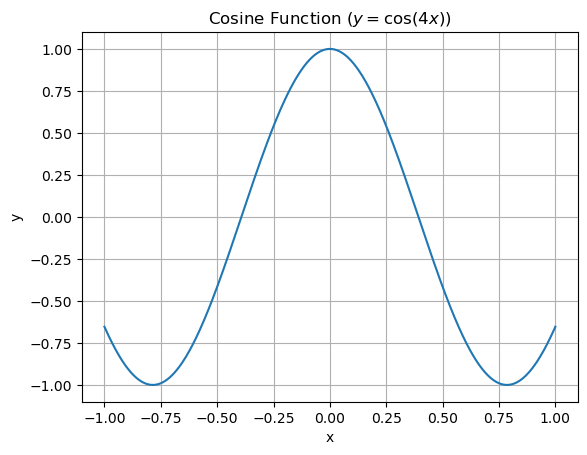

In [18]:
#We first generate 1000 values from -1 to 1 as follows.
x_values = np.linspace(-1, 1, 1000)

#We then calculate the y values i.e. the cosine function by using these x values.
y_values = np.cos(4 * x_values)

#We convert both of the datasets into Torch Tensors.
#Note that the dtype = torch.float32 is needed since the model expects floats!
x_tensor = torch.tensor(x_values, dtype = torch.float32)
y_tensor = torch.tensor(y_values, dtype = torch.float32)

#We then plot the function as follows.
plt.plot(x_values, y_values)
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"Cosine Function ($y = \cos(4x))$")
plt.grid(True)
plt.show()

2. (2 points) Define a network that implements a simple single-layer perceptron that maps general 1-dim inputs (x) onto general 1-dim outputs (y), with `nhidden` hidden parameters in the hidden layer. Use the ReLu activation function after the hidden layer. Instead of using `nn.Sequential` like above, complete the network class below. You have encountered this way of defining models before in section 6.3 on exercise sheet 4.

### Answer:

In [19]:
#Note that this time we are NOT using nn.Sequential!
#We instead define a class just like it was shown on previous "Exercise Sheet 3" => 6.3.
class SimplePerceptron(torch.nn.Module):
    #Constructor.
    #Called when an instance of the class is created.
    def __init__(self, nhidden):
        #We initialize the model.
        super(SimplePerceptron, self).__init__()

        #We then define our Model.
        #We first start with a Linear "Single-Layer Perceptron" with 1 Input Feature as a hidden layer with 
        #"nhidden" being the hidden parameters/units in the hidden layer.
        self.hidden = torch.nn.Linear(1, nhidden)

        #We then define the ReLU Activation Function right after the hidden layer.
        self.relu = torch.nn.ReLU()

        #We then define the Output Layer with 1 Feature as follows.
        self.output = torch.nn.Linear(nhidden, 1)

    #Now we define how Input Data flows through the model.
    def forward(self, x):
        #Takes x as an input and passes it through all the Layers we have defined.
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        
        return x

3. (2 points) Train that model to recover the cosine curve. You should do so by minimizing the mean square error between the predicted function and the ground truth cosine function defined above. What is the minimum number of hidden parameters that you need for results that you would consider satisfactory?

*Hint: Pytorch has a built-in MSE loss you may use, check the documentation.  It helps to randomize the ordering of the data to improve training. Consider a minibatch size of 16 or 32, about 100-200 epochs, and a small enough learning rate.*

### Answer:

* We'll follow the following algorithm: *(Just like we did previously)*
    * 1-) **Define the Model**
    * 2-) **Define Optimizer and Loss Function**
    * 3-) **Randomize the Ordering of the Data**
    * 4-) **Split Data into Minibatches**
    * 5-) **Perform Training over Multiple Epochs**
    * 6-) **Evaluate the Trained Model**

Epoch 1 -- Loss: 0.597685
Epoch 11 -- Loss: 0.034317
Epoch 21 -- Loss: 0.034347
Epoch 31 -- Loss: 0.034546
Epoch 41 -- Loss: 0.034788
Epoch 51 -- Loss: 0.035068
Epoch 61 -- Loss: 0.035402
Epoch 71 -- Loss: 0.035794
Epoch 81 -- Loss: 0.036637
Epoch 91 -- Loss: 0.038059
Epoch 101 -- Loss: 0.026525
Epoch 111 -- Loss: 0.014593
Epoch 121 -- Loss: 0.007640
Epoch 131 -- Loss: 0.009577
Epoch 141 -- Loss: 0.006918
Epoch 151 -- Loss: 0.005897
Epoch 161 -- Loss: 0.004192
Epoch 171 -- Loss: 0.002509
Epoch 181 -- Loss: 0.002077
Epoch 191 -- Loss: 0.001698


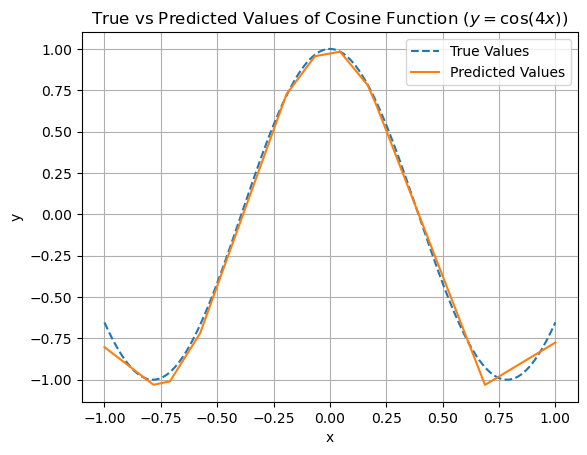

In [20]:
#We define our Model by using the class we have defined above.
#We choose the Hidden Layer Size to be 25 but we may change this if we want to see how it affects the results.
model = SimplePerceptron(nhidden = 25)

#We define the Optimizer and Loss Function.
#Note that this time we use MSE Loss instead of BCE Loss.
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

#We randomize the ordering of data.
#For this we use "torch.randomperm" which is basically np.random.permutation except for Torch Tensors.
#We use the x_tensor we have defined to check how many random indices we need to generate.
indices = torch.randperm(len(x_tensor))

#We define the Training Parameters i.e. Batch Size and Number of Epochs.
batch_size = 32
nepochs = 200

#We do the Training Loop which is basically the same as the previous one on 7.2!
#But this time we do have a batch size so we don't need to check that.
#We also don't do shuffling here.
for epoch in range(nepochs):
    #We check how many minibatches we can create from the Input Tensor we have.
    for i in range(0, len(x_tensor), batch_size):
        #We get the Batch Indices.
        batch_indices = indices[i : i + batch_size]

        #We then get the Minibatches for both x and y.
        #Note that we add an extra dimension for output for x_batch!
        x_batch = x_tensor[batch_indices].unsqueeze(1)
        y_batch = y_tensor[batch_indices]

        #We set the Gradient to Zero!
        optimizer.zero_grad()

        #We call the Model to Make Predictions! (forward pass)
        output = model(x_batch)

        #We Evaluate the Predictions using Loss! (compute loss)
        loss = criterion(output, y_batch.unsqueeze(1))
        
        #We Evaluate the Gradient of the Loss. (backward pass)
        loss.backward()

        #We take an Optimizer Step!
        optimizer.step()

    #We check the loss rate once per 10 epochs.
    if epoch % 10 == 0:
        print(f"Epoch {epoch + 1} -- Loss: {loss.item():.6f}")

#We then evaluate the trained model as follows.
with torch.no_grad():
    model.eval()
    x_eval_tensor = torch.from_numpy(x_values).unsqueeze(1).to(torch.float32)
    y_pred = model(x_eval_tensor)

#Finally, we plot the Original and Predicted Functions
plt.plot(x_values, y_values, "--", label = "True Values")
plt.plot(x_values, y_pred, label = "Predicted Values")
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"True vs Predicted Values of Cosine Function ($y = \cos(4x))$")
plt.legend()
plt.grid(True)
plt.show()

* We can use the code to try many different Sizes for the Hidden Layers.
* From my trials, I've found that **the size/parameters for the Hidden Layer has to be minimum 20 to be satisfactory!**

**Usage** of AI: *Used **mostly** on the last part (part 3) for explaining the Code and the Theory behind what the code does. (Most of the code on part 3 was written with the help of AI especially for squeeze-unsqueeze parts and evaluation)*

## Chapter 8: Convolutional Neural Networks (13 points)

In this exercise, we will be building a convolutional network in PyTorch to recognize handwritten digits as given in the MNIST dataset.

Required reading (*pior* to starting the exercises!):

https://nextjournal.com/gkoehler/pytorch-mnist (Excellent blog post on which these exercises are based)

https://en.wikipedia.org/wiki/MNIST_database (Description of the dataset we will be working with)

### 8.1 Convolutions (1 point)

1. (1 point)
  Before implementing convolutions using pytorch below, let us make sure we understand what they are doing, by hand.

  Consider the convolutional kernel

  $$
  K = \begin{pmatrix}
    1 & 2 \\
    3 & 4
  \end{pmatrix} \,,
  $$

  and the  input data

  $$
  I = \begin{pmatrix}
    -1 & 1 & 0 \\
    1 & -1 & -1 \\
    1 & 1 & 1
  \end{pmatrix} \,.
  $$

  By hand, compute the convolution $I \circledast K$ without padding (also known as 'valid', so your output should be a 2x2 matrix).

### Answer:

* **Convolution is done by the following steps:**
    * 1-) **Our $K$ Matrix is the "filter/kernel"**
    * 2-) **We need to slide it over the $I$ Matrix to get a $2\times2$ matrix!**
    * 3-) **To do this, *we slide the Filter/Kernel Matrix $K$ over the rows.***

* Now let's show this mathematically.
* We have the following Matrices:

$$
  K = \begin{pmatrix}
    1 & 2 \\
    3 & 4
  \end{pmatrix} \,
  $$

$$
  I = \begin{pmatrix}
    -1 & 1 & 0 \\
    1 & -1 & -1 \\
    1 & 1 & 1
  \end{pmatrix} \,
  $$

<h5><center>We put the Kernel Matrix $K$ onto the first row.</h5>

$$
I_{11} \circledast K = \begin{pmatrix}
1 \times (-1) & 2 \times 1 \\
3 \times 1 & 4 \times (-1)
\end{pmatrix} = \begin{pmatrix}
-1 & 2 \\
3 & -4
\end{pmatrix}$$

<h5><center>We sum all of the elements of the result of the "element-wise" multiplication which gives us the first element of the $I \circledast K$ Convolution Matrix.</h5>

$$ \text{Sum} = -1 + 2 + 3 - 4 = 0$$

<h5><center>We slide the Kernel Matrix $K$ in the first row.</h5>

$$
I_{12} \circledast K = \begin{pmatrix}
1 \times (1) & 2 \times 0 \\
3 \times (-1) & 4 \times (-1)
\end{pmatrix} = \begin{pmatrix}
1 & 0 \\
-3 & -4
\end{pmatrix}$$

<h5><center>We sum all of the elements of the result of the "element-wise" which gives the second element.</h5>

$$ \text{Sum} = 1 + 0 - 3 - 4 = -6$$

<h5><center>We put the Kernel Matrix $K$ onto the second row.</h5>

$$
I_{21} \circledast K = \begin{pmatrix}
1 \times (1) & 2 \times -1 \\
3 \times (1) & 4 \times (1)
\end{pmatrix} = \begin{pmatrix}
1 & -2 \\
3 & 4
\end{pmatrix}$$

<h5><center>We sum all of the elements of the result of the "element-wise" which gives the third element.</h5>

$$ \text{Sum} = 1 - 2 + 3 + 4 = 6$$

<h5><center>We slide the Kernel Matrix $K$ in the second row.</h5>

$$
I_{22} \circledast K  = \begin{pmatrix}
1 \times (-1) & 2 \times (-1) \\
3 \times (1) & 4 \times (1)
\end{pmatrix} = \begin{pmatrix}
-1 & -2 \\
3 & 4
\end{pmatrix}$$

<h5><center>We sum all of the elements of the result of the "element-wise" which gives the fourth element.</h5>

$$ \text{Sum} = -1 - 2 + 3 + 4 = 4$$

<h5><center>From here the Convolution of $I$ and $K$ matrices is as follows.</h5>

$$I \circledast K = \begin{pmatrix}
0 & -6 \\
6 & 4
\end{pmatrix} $$

2. (2 point) Convolutional layers are the basic building block of deep convolutional neural networks that are used for image analysis tasks.
(a) Consider a 2-dim convolution layer with 2-channel input and 4-channel output. What is the number of parameters of that kernel if the kernel size is $5 \times 5$, including bias parameters?
(b) Describe in what sense convolutional layers are translation invariant. Are they rotation variant? (3-5 lines)

### Answer:

### a)
*Consider a 2-dim convolution layer with 2-channel input and 4-channel output. What is the number of parameters of that kernel if the kernel size is $5\times5$, including bias parameters?*

* We want to calculate the Number of Parameters in a Convolutional Layer (**including bias parameters**).
* For this we need to consider:
    * 1-) **Number of Weights (Parameters) per Filter:**
        * **For each channel in the input, there is a set of weights/parameters for each channel in the output!**
        * For that reason, the number of parameters per filter is: **The product of the Number of Input Channels and the Number of Output Channels!!**
    * 2-) **Number of Bias Parameters per Filter:**
        * **Each Output Channel has its own bias parameter.**
    * 3-) **Total Number of Parameters:**
        * **Sum of the Parameters from all the Filters!**

* **The following are given to us:**
    * 1-) **Input Channels:** $C_{in} = 2$
    * 2-) **Output Channels:** $C_{out} = 4$
    * 3-) **Kernel Size:** $5 \times 5$

* From what we have discussed:
    * 1-) **Number of Parameters per Filter:**
        * There are 2 Input Channels.
        * There are 4 Output Channels.
        * The Kernel Size is $5\times5$ which means there are that many parameters.
        * ***Number of Parameters per Filter:*** **$2 \times 4 \times 5 \times 5 = 200$**
    * 2-) **Number of Bias Parameters per Filter:**
        * There are 4 Output Channels.
        * ***Number of Bias Parameter Per Filter:*** **$4$**
    * 3-) **Total Number of Parameters:**
        * It is the sum of all the Parameters.
        * ***Total Number of Parameters:*** $200 + 4 = 204$

### b-)
*Describe in what sense convolutional layers are translation invariant. Are they rotation variant? (3-5 lines)*

* **Convolutional Layers are Translation Invariant!**
    * 1-) **The same filter is applied at every position of the input image!**
    * 2-) **That's how they detect features *regardless of their location within the image!***
    * 3-) **This makes Convolutional Neutral Networks robust to translations.**

* **Convolutional Layers are NOT Rotation Invariant!**
    * 1-) **The filters are not rotationally symmetric!!!** (Same filter does not get applied at every position of the image)
    * 2-) **The same feature in different orientations may activate different filters!**
    * 3-) **This might lead to different responses which makes Convolutional Neural Networks sensitive to rotations!**

**Usage** of AI: *Used for calculation steps and theory behind the concepts.*

### 8.2 Using the GPU

One advantage of using pytorch as a framework is that it allows us to execute our code on the GPU. This can often greatly reduce the runtime needed to train neural networks. Below is a short description of how to do this.

If you want to try this out on Colab, you need to switch to GPU by selecting "Runtime > Change runtime type > GPU".

**Note:** Using a GPU is not required here, but it will make the code run faster. You can also complete the exercises using only the CPU.

In [21]:
#Check if a GPU is available for pytorch
torch.cuda.is_available()

False

In [22]:
#We now select the device based on what is available
if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')

In [23]:
#Let's look consider some dummy data
x = torch.tensor([0., 1., 2.])

In [24]:
#Currently, the data is on the cpu
x.device

device(type='cpu')

In [25]:
#If we want to run code on the GPU, we have to move the input data to the corresponding device
x = x.to(DEVICE)

In [26]:
#We can check what device the tensor is on
x.device

device(type='cpu')

**Usage** of AI: *None*

### 8.3 MNIST dataset (2 points)

Let's first initialize the random seeds.

In [27]:
# DO NOT CHANGE THIS
random_seed = 1
torch.manual_seed(random_seed)

Then we load training data.  We use here the traditional MNIST dataset, which are 28x28 images of hand-written digits between 0 and 9.

(Note: Don't worry if you see an HTTP Error 503 message, torchvision tries multiple URLs to download the data)

In [28]:
batch_size_train = 64  # by default we use a minibatch size of 64 for training.
# You can leave it like that during the subsequent exercises.

batch_size_test = 1000

train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('./files/', train=True, download=True,
          transform=torchvision.transforms.Compose([
              torchvision.transforms.ToTensor(),
              torchvision.transforms.Normalize(
                  (0.1307,), (0.3081,)),

          ])),
    batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('./files/', train=False, download=True,
          transform=torchvision.transforms.Compose([
              torchvision.transforms.ToTensor(),
              torchvision.transforms.Normalize(
                  (0.1307,), (0.3081,)),
          ])),
    batch_size=batch_size_test, shuffle=True)

1. (1 point) Look up the `DataLoader` in PyTorch documentation. Explain the role of the `transform` statement in the above data loaders. What do the numbers 0.1307 and 0.3081 represent? Why do we normalize?  Why do we set `shuffle = True`?

### Answer:

* **`transform`**:
    * **Used to specify Data Transformations that should be applied to each Sample in the Dataset before its returned by the Data Loader!**
    * For example `transforms.Compose` is used to chain together multiple transformations such as converting image to a tensor and normalizing it.

* **Numbers $0.1307$ and $0.3081$:**
    * $0.1307$: **Global Mean of the Dataset**
    * $0.3081$: **Global Standard Deviation of the Dataset**

* **Why do we Normalize?**:
    * **We Normalize to scale it to have a Mean of $0$ and Standard Deviation of $1$!**
    * **This helps in stabilizing the learning process during training!**

* **Why do we set `shuffle = True`?**:
    * **Setting `shuffle = True` means that the Data will be shuffled during training!** *(Remember the previous parts where we did this manually)*
    * **This helps prevent the model learning the order of examples in the dataset!!!** *(Very important! If this happens, model can overfit!)*
    * **It also assures that each minibatch of data fed to the model during training contains a diverse set of examples!**

The loaders act as Python `generator` objects. Now let's take a look at some examples. We'll use `test_loader` for this.

The `list` function transforms it into a simple Python list, which contains tuples of batches of example images and "targets" (the correct digit). Let's see what one test data batch consists of.

In [29]:
#We take the "test_loader" iterable and turn it into a list. => torch.Size([1000, 1, 28, 28]) and 
#torch.Size([1000])
#This way, each element of the list REPRESENTS A MINIBATCH of data from the Test Dataset!
examples = list(test_loader)

#We then retrieve the First Minibatch of data from the list we have defined.
    #example_data: Contains the Input Data (images) from the first mini-batch i.e torch.Size([1000, 1, 28, 28])
#where the numbers represent [batch_size, channels, height, width].
        #batch_size: Number of images in the batch
        #channels: Number of color channels in the Images
        #height: Height of Each Image
        #width: Width of Each Image
    #example_targets: Contains the corresponding Target Labels for the Input Data i.e. torch.Size([1000]) where
#the number represents the batch_size.
        #batch_size: Number of labels in the batch
        #Each element represents the Label of the Corresponding Image
example_data, example_targets = examples[0]

#We print the Shapes of the Images/Example Data and the Labels/Example Targets.
print(example_data.shape)
print(example_targets.shape)

torch.Size([1000, 1, 28, 28])
torch.Size([1000])


2. (1 point) Explain all components of the shapes of `example_data` and `example_targets`.

### Answer:

* It is already explained in the Code comments but we can rewrite them here.

* **`example_data`:** Contains the Input Data (images) from the first mini-batch i.e **`torch.Size([1000, 1, 28, 28])`** where the numbers represent [batch_size, channels, height, width]:
    * **batch_size:** Number of images in the batch
    * **channels:** Number of color channels in the Images
    * **height:** Height of Each Image
    * **width:** Width of Each Image

* **`example_targets`:** Contains the corresponding Target Labels for the Input Data i.e. `torch.Size([1000])` where the number represents the batch_size.
    * **batch_size:** Number of Labels in the batch

Let's visualize some of our test data.

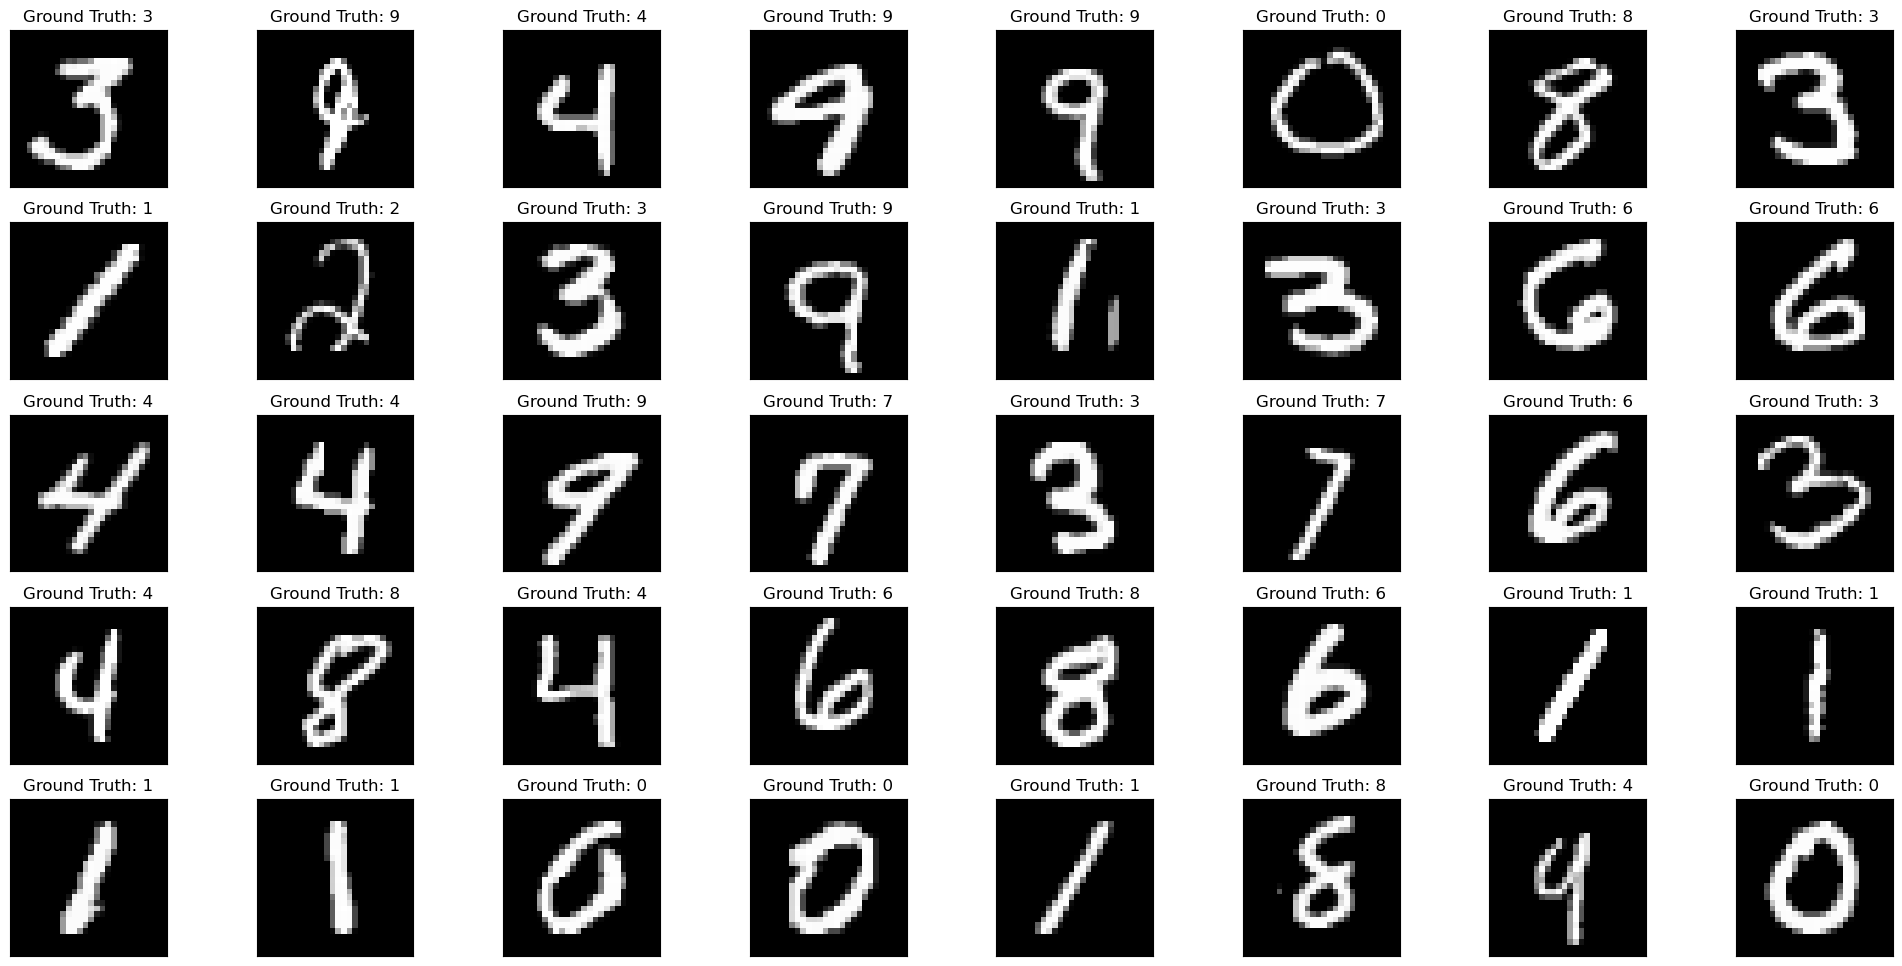

In [30]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 10))
for i in range(40):
    plt.subplot(5,8,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Ground Truth: {}".format(example_targets[i]))
    plt.xticks([])
    plt.yticks([])

We will subsequently use the training data for training, and the test data for estimating the accuracy of our training. The next step is to define a convolutional neural network.

**Usage** of AI: *Used on explaining the Code and the Theory behind what the code does alongside explaining some parts of the `DataLoader` documentation.*

### 8.4 Building a CNN (5 points)

1. (4 points) Below you can see a diagram for a convolutional network, similar to the one you saw during the lecture. Translate this diagram into a PyTorch model by filling in the `Net` class below. After each max pooling step and after the first dense (linear) layer apply the relu activation function. You should use the modules `nn.Conv2d`, `nn.Linear` and the functions `F.max_pool2d` and `F.relu`.
Check the PyTorch documentation for these functions to see what parameters you must provide.

*Hint: Carefully think about the shapes of the intermediate layers and add padding to the convolutions where necessary, based on the information given below!*

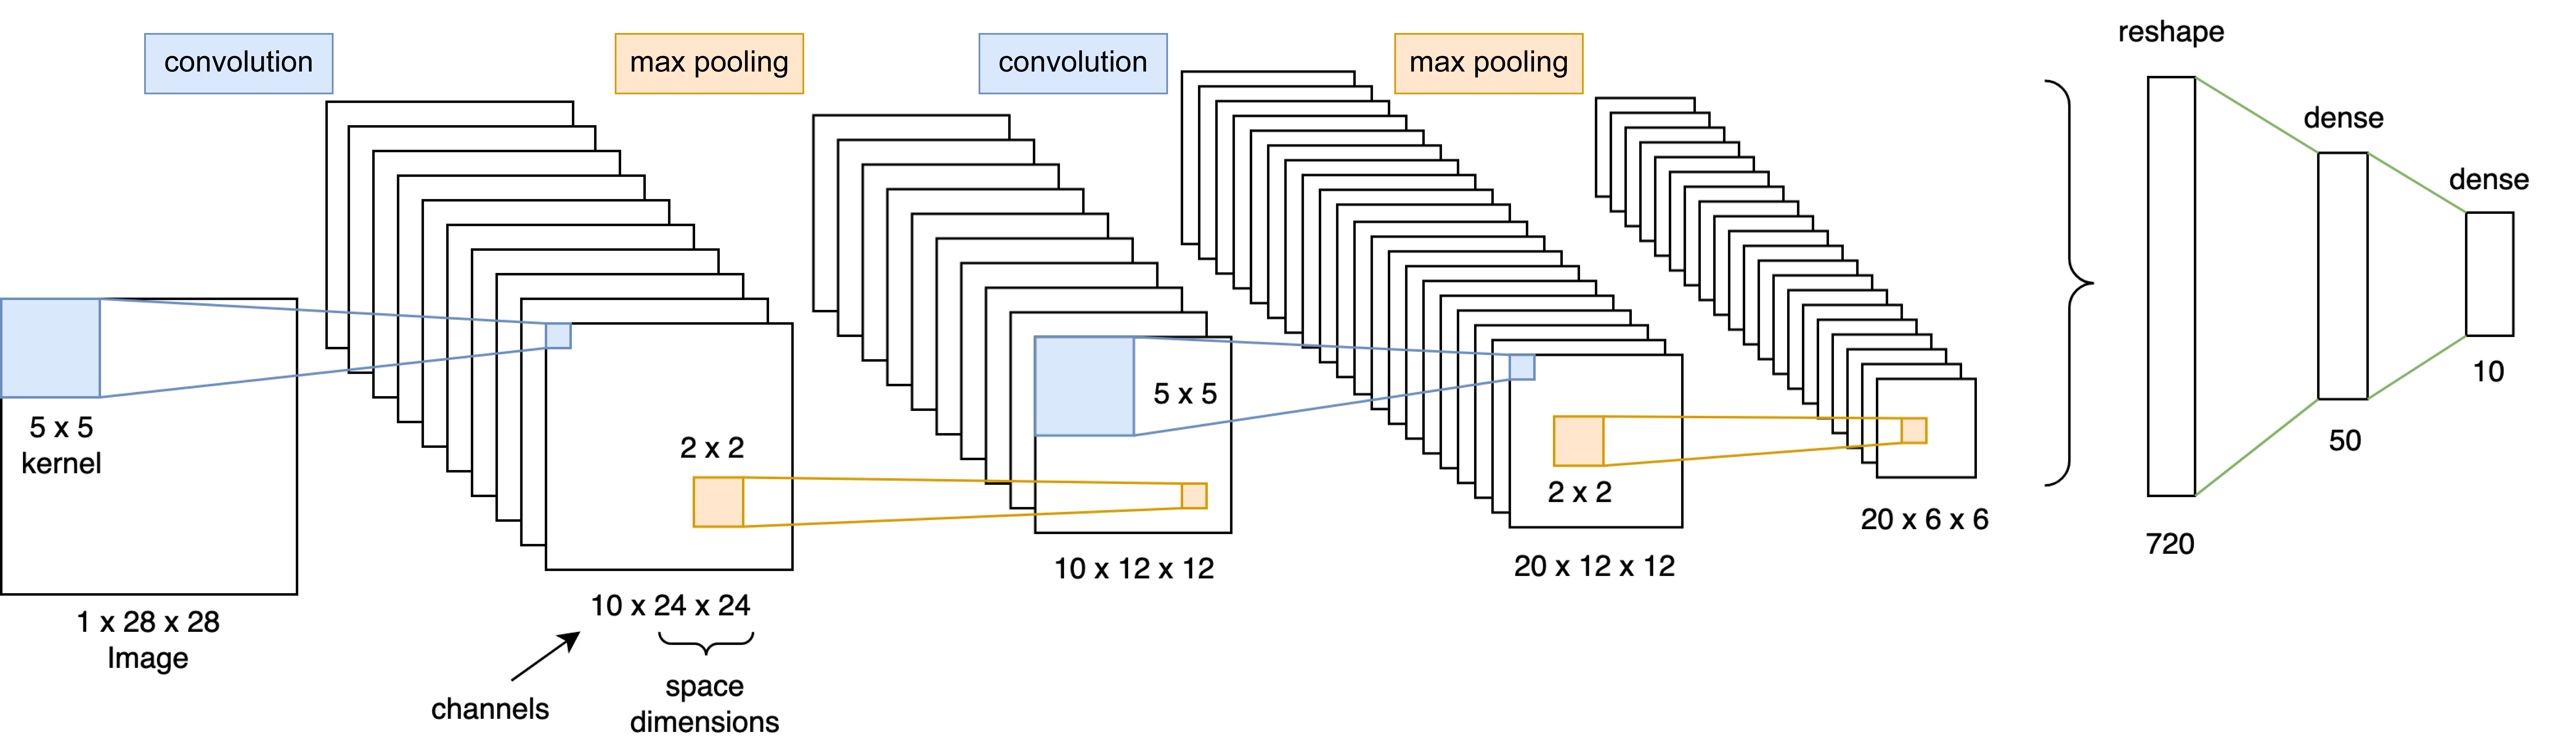

### Answer:

* First of all let's describe this diagram of Convolutional Network.
* 1-) **Input Image:**
    * $1\times28\times28$ => $1$ Channel & $28\times28$ Spatial Dimensions
* 2-) **First Convolutional Layer:**
    * $5\times5$ Kernel
    * $10\times24\times24$ Output => $10$ Channels & $24\times24$ Spatial Dimensions
* 3-) **First Max Pooling Layer:**
    * $2\times2$ Pooling
    * $10\times12\times12$ Output => $10$ Channels & $12\times12$ Spatial Dimensions
* 4-) **Second Convolutional Layer:**
    * $5\times5$ Kernel
    * $20\times12\times12$ Output => $20$ Channels & $12\times12$ Spatial Dimensions
* 5-) **Second Max Pooling Layer:**
    * $2\times2$ Pooling
    * $20\times6\times6$ Output => $20$ Channels & $6\times6$ Spatial Dimensions
* 6-) **Flattening/Reshaping:**
    * Reshape into **1 Dimensional** Vector with $720$ length! =>  $20$ Channels & $6\times6$ Spatial Dimensions
* 7-) **First Fully Connected/Dense Layer:**
    * Output => $50$ Units
* 8-) **Second Fully Connected/Dense Layer:**
    * Output => $10$ Units

In [31]:
#We import the Libraries we need.
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [32]:
#We define the class.
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        #We define the First Convolutional Layer.
        self.conv1 = nn.Conv2d(1, 10, kernel_size = 5)

        #We define the Second Convolutional Layer.
        self.conv2 = nn.Conv2d(10, 20, kernel_size = 5, padding = 2)

        #We define the First Dense Layer.
        self.dense1 = nn.Linear(20 * 6 * 6, 50)

        #We define the Second Dense Layer.
        self.dense2 = nn.Linear(50, 10)

    def forward(self, x):
        #We apply "relu" activation function to First Convolutional Layer.
        #Then we apply Max Pooling to it.
        #"2" is there as the Pooling size 2x2!
        x = F.relu(F.max_pool2d(self.conv1(x), 2))

        #We apply "relu" activation function to Second Convolutional Layer.
        #Then we apply Max Pooling to it.
        x = F.relu(F.max_pool2d(self.conv2(x), 2))

        #We then flatten/reshape the output.
        x = x.view(-1, 20 * 6 * 6)

        #We apply the First Dense Layer.
        #We apply ReLU for Non-Linearity.
        x = F.relu(self.dense1(x))

        #We then apply the Second Dense Layer.
        x = self.dense2(x)
        
        return x

Now we define the optimizer, and instantiate the network.

In [33]:
#We define the learning rate for the Optimizer.
learning_rate = 0.001

#We move the Network to the GPU.
network = Net().to(DEVICE)

#We define our Optimizer "Adam".
optimizer = optim.Adam(network.parameters(), lr=learning_rate)

#2 epochs by default.  Leave it like that throughout the subsequent exercises.
n_epochs = 2

#We define Lists to keep the Training and Testing Losses and Counters!
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

#We determine how often the training should log the information about Losses and Counter!
log_interval = 10

####################################### This is the main Training loop #######################################

#We define the Training Loop.
def train(epoch):
    #We set the Network/Model into Training Mode.
    network.train()

    #We loop over Batches of Data from "train_loader".
    for batch_idx, (data, target) in enumerate(train_loader):
        #This part is same as our previous algorithm for training.

        #We set the Gradient to Zero!
        optimizer.zero_grad()

        #We add the Data and the Label to the Device.
        data = data.to(DEVICE)
        target = target.to(DEVICE)

        #We call the Model to Make Predictions! (forward pass)
        output = network(data)

        #We Evaluate the Predictions using Loss! (compute loss)
        loss = F.cross_entropy(output, target)

        #We Evaluate the Gradient of the Loss. (backward pass)
        loss.backward()

        #We take an Optimizer Step!
        optimizer.step()

        #We check the Batch Index.
        #If the index is in "tens", we print the Training Epoch and add the Loss + Counter to our lists.
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            train_losses.append(loss.item())
            train_counter.append(
                (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))

##############################################################################################################

######################################## This is the main Testing loop #######################################

#We define the Testing Loop.
def test():
    #We set the Network/Model into Evaluation Mode.
    network.eval()

    #We define test_loss and set it to zero to keep track of the total loss on the test dataset.
    test_loss = 0

    #We define correct and set it to zero to keep track of the number of correctly classified samples!
    correct = 0

    #We use torch.no_grad() to avpid calculating any gradients! => Good for Memory Usage!
    with torch.no_grad():
        #We check all the data/images and targets/labels in the test_loader.
        for data, target in test_loader:
            #We add the Data and the Label to the Device.
            data = data.to(DEVICE)
            target = target.to(DEVICE)

            #We pass the data through our network.
            #Basically we call the Model to Make Predictions! (forward pass)
            output = network(data)

            #We Evaluate the Predictions using Loss! (compute loss)
            #This time we add it to our test_loss variable!
            test_loss += F.cross_entropy(output, target, reduction='sum').item()

            #We predict the Class Labels by taking the Index of the maximum Value along the second
            #dimension of the Output Tensor!!!
            pred = output.data.max(1, keepdim=True)[1]

            #We calculate how many times the Model has guessed the Labels correct by comparing the predicted
            #labels "pred" with target labels "target"!
            correct += pred.eq(target.data.view_as(pred)).sum()

    #We calculate the average Test Loss by dividing it with the number of samples in the test dataset.
    test_loss /= len(test_loader.dataset)

    #We append the average test loss to a list to keep the track of losses.
    test_losses.append(test_loss)

    #We print out the Evaluation results.
    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

##############################################################################################################

2. (1 point) Write down mathematically how the fraction of correct classifications on the test data is calculated in the above test function.

### Answer:

* **`correct`: Represents the number of times our Model has classified the samples of Test Dataset correctly!**
* **`total`: The Number of Samples in the Test Dataset!** => Given with `len(test_loader.dataset)`!

* **The fraction of correct classifications** on the test data is known as **Accuracy**!
* It is given with the following formula:
$$ \text{Accuracy} = \frac{\text{correct}}{\text{total}} $$

**Usage** of AI: *Used mostly on explaining, writing the Code and the Theory behind what the code does.*

### 8.5 Evaluating the CNN's Performance (3 points)

Now let's do the training!

In [34]:
test()
for epoch in range(1, n_epochs + 1):
    train(epoch)
    test()


Test set: Avg. loss: 2.3044, Accuracy: 981/10000 (10%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.318732
Train Epoch: 1 [640/60000 (1%)]	Loss: 1.957237
Train Epoch: 1 [1280/60000 (2%)]	Loss: 1.249861
Train Epoch: 1 [1920/60000 (3%)]	Loss: 0.599824
Train Epoch: 1 [2560/60000 (4%)]	Loss: 0.644694
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.580383
Train Epoch: 1 [3840/60000 (6%)]	Loss: 0.356341
Train Epoch: 1 [4480/60000 (7%)]	Loss: 0.526991
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.293744
Train Epoch: 1 [5760/60000 (10%)]	Loss: 0.277784
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.316466
Train Epoch: 1 [7040/60000 (12%)]	Loss: 0.238051
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.259899
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.146823
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.280047
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.245042
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.185635
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.181470
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.179100
Train Epoch: 1 [12160/

Let's plot the training curve.

Text(0, 0.5, 'negative log likelihood loss')

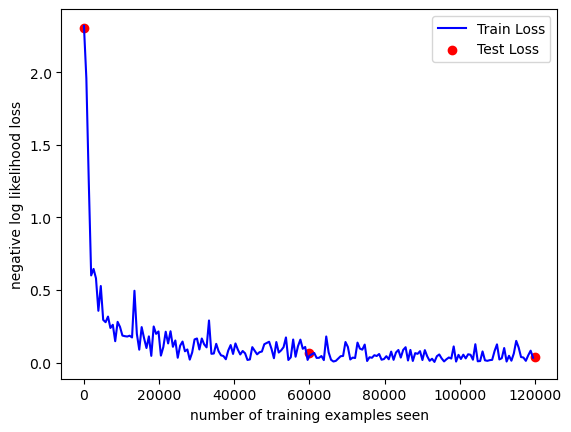

In [35]:
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')

Let's again look at a few examples as we did earlier in Section 9.1.2 and compare the model's output.

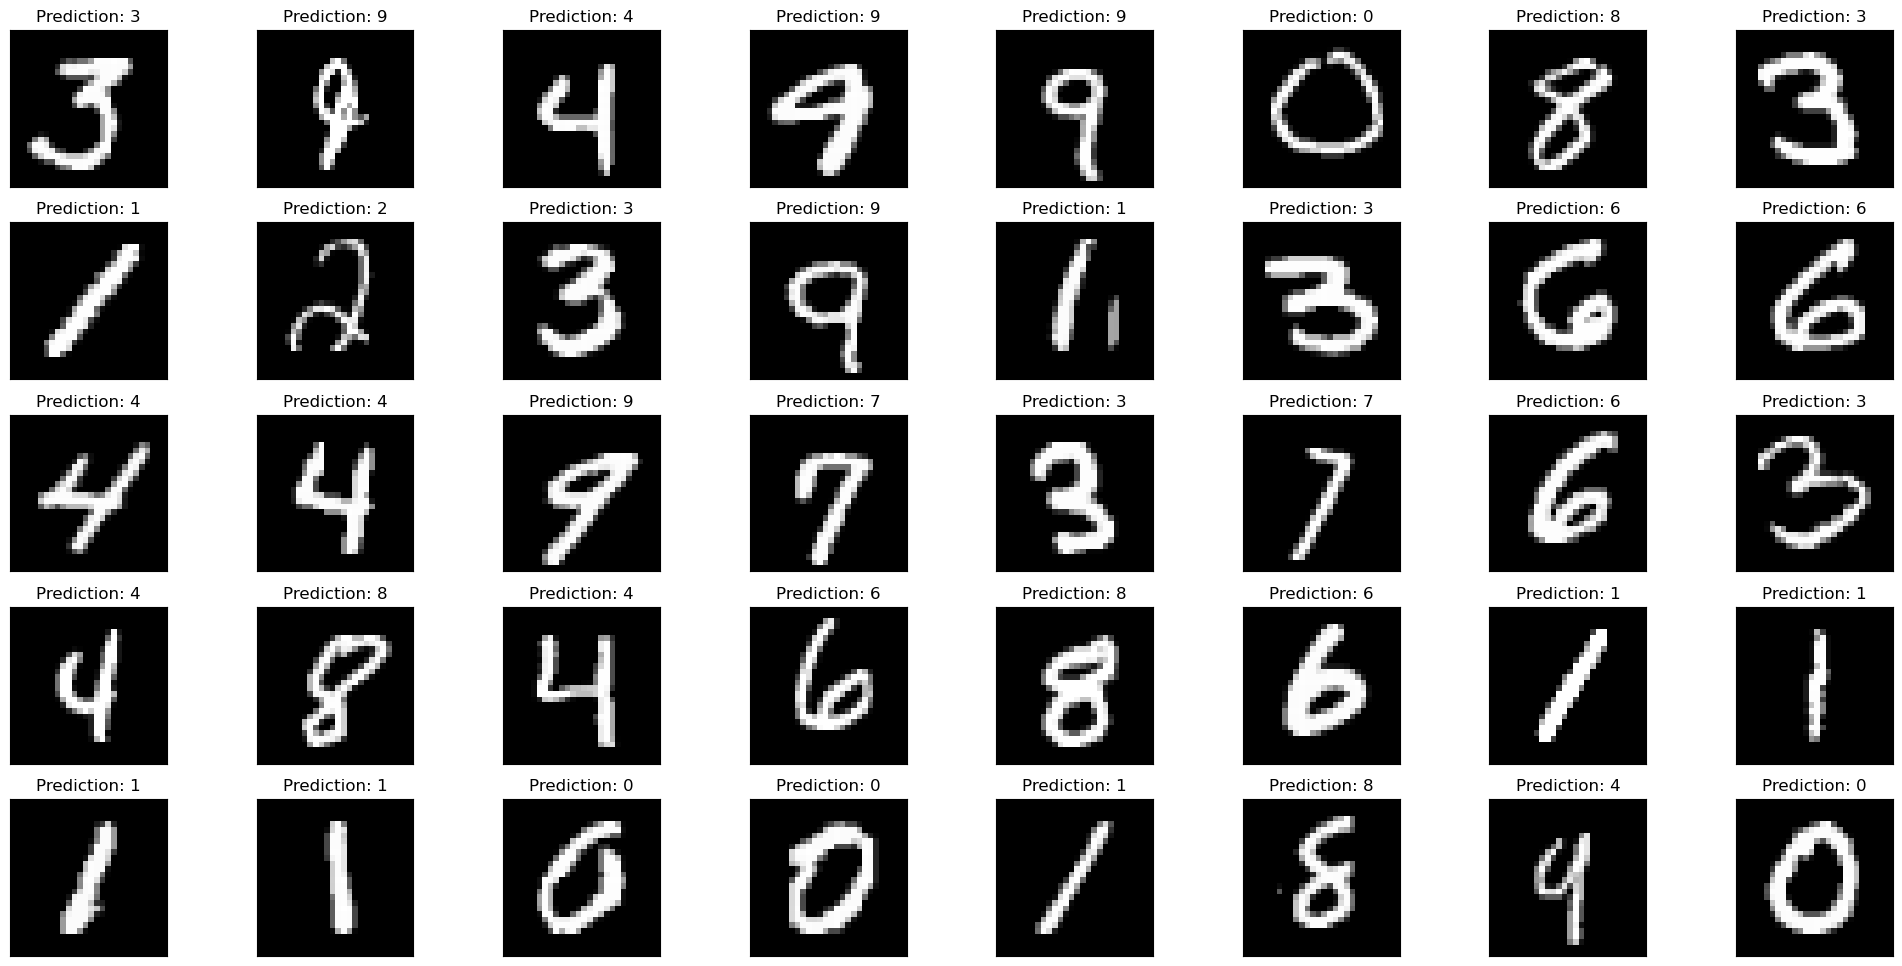

In [36]:
with torch.no_grad():
    output = network(example_data.to(DEVICE))

fig = plt.figure(figsize=(20, 10))
for i in range(40):
    plt.subplot(5,8,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Prediction: {}".format(
        output.data.max(1, keepdim=True)[1][i].item()))
    plt.xticks([])
    plt.yticks([])

1. (0.5 points) Run the above code and confirm that it has an accuracy of 98% or so. Explain why the initial accuracy is around 10%.

### Answer:

* **When we initially train our Model without any Prior Training it starts with *Random Weights!***
* Since the Model Parameters are randomly initialized, it is making **random guesses for each input sample at the first training.** *(Hence the %10 Accuracy!)*

* **After training, the *model weights start to improve!***
* That's why **accuracy increases to %98 - %99!**

2. (2.5 points) Let's compare this to a one-layer perceptron (i.e. no hidden layers). Write a new `class Net` that flattens the 28 x 28 images, passes them through one fully connected linear layer with input size 28 times 28 and outputs a 10 dimensional one-hot vector. What is the classification accuracy in this case? Are you surprised? Discuss how the accuracy compares to the accuracy from the CNN from before.

### Answer:

In [39]:
#We define a new class.
class New_Net(nn.Module):
    def __init__(self):
        super(New_Net, self).__init__()
        
        #We flatten the Input Images (28 x 28) into a 1D tensor!
        self.flatten = nn.Flatten()

        #We define Fully Connected/Dense Linear Layer.
        self.dense = nn.Linear(28 * 28, 10)

    def forward(self, x):
        #We flatten the Input Images.
        x = self.flatten(x)

        #We pass the Flattened Input through the Dense Layer.
        x = self.dense(x)
        
        return x

#Now we define the network as New_Net.
network = New_Net().to(DEVICE)

#We do the testing.
test()
for epoch in range(1, n_epochs + 1):
    train(epoch)
    test()


Test set: Avg. loss: 2.5328, Accuracy: 740/10000 (7%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.639353
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.619043
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.648514
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.540260
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.527233
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.570346
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.486116
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.415283
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.704094
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.475111
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.395263
Train Epoch: 1 [7040/60000 (12%)]	Loss: 2.556338
Train Epoch: 1 [7680/60000 (13%)]	Loss: 2.496909
Train Epoch: 1 [8320/60000 (14%)]	Loss: 2.529933
Train Epoch: 1 [8960/60000 (15%)]	Loss: 2.631206
Train Epoch: 1 [9600/60000 (16%)]	Loss: 2.515245
Train Epoch: 1 [10240/60000 (17%)]	Loss: 2.615796
Train Epoch: 1 [10880/60000 (18%)]	Loss: 2.680818
Train Epoch: 1 [11520/60000 (19%)]	Loss: 2.599095
Train Epoch: 1 [12160/6

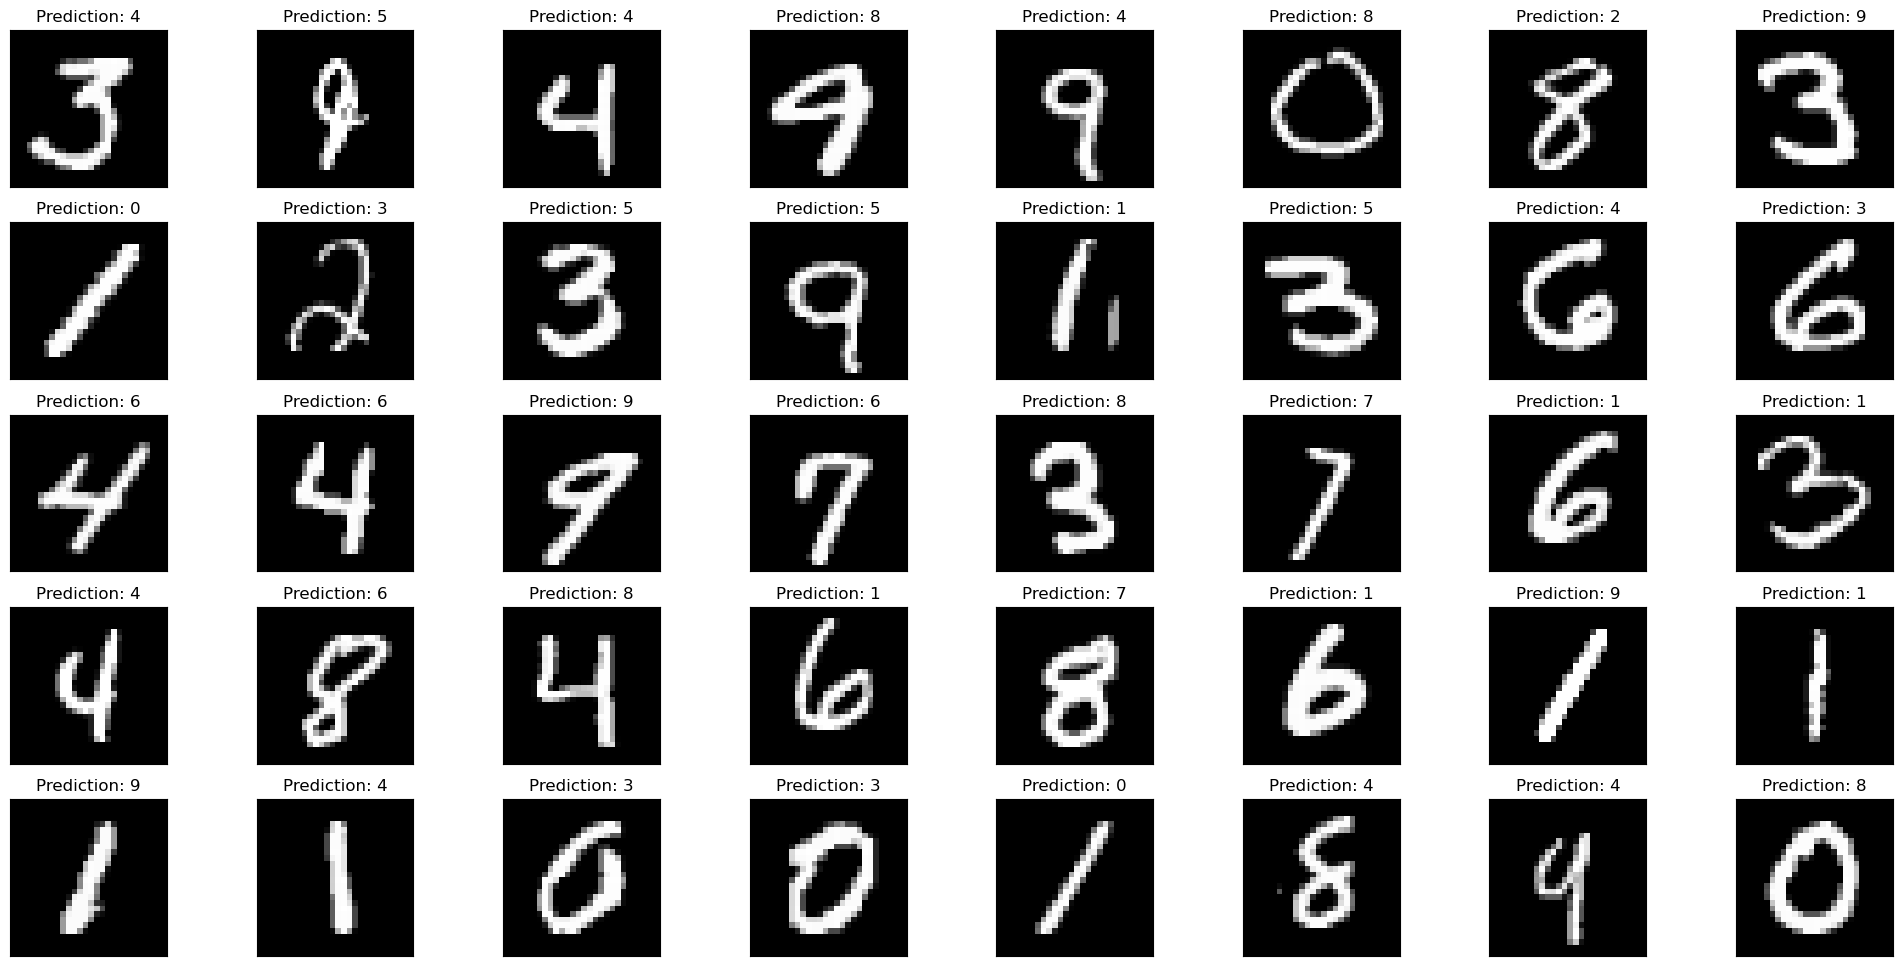

In [40]:
#We now check the Guesses of our new Trained Model.
with torch.no_grad():
    output = network(example_data.to(DEVICE))

fig = plt.figure(figsize=(20, 10))
for i in range(40):
    plt.subplot(5,8,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Prediction: {}".format(
        output.data.max(1, keepdim=True)[1][i].item()))
    plt.xticks([])
    plt.yticks([])

*What is the classification accuracy in this case? Are you surprised? Discuss how the accuracy compares to the accuracy from the CNN from before.*

* **The Classification Accuracy:** $\%7$
* **The Classification Accuracy of the Previous Neural Network/Model:** $\%99$

* **This is expected since the number of layers have been drastically decreased in our Second Model!**
* **Less layers mean that the model cannot capture Spatial Information and Patterns well enough!**

**Usage** of AI: *Used **mostly** on explaining, writing the Code and the Theory behind what the code does.*